In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../DataSets/HR_Attrition.csv')

 Data Loading and Cleaning
----------------------------------

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.WorkLifeBalance.unique()

array([1, 3, 2, 4], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 Descriptive Analysis
----------------------------

In [6]:
df=df.drop("EmployeeCount",axis=1)

In [7]:
df=df.drop("StandardHours",axis=1)

In [8]:
df=df.drop("Over18",axis=1)

 Visualization of Employee Distribution
-----------------------------------------------

In [11]:
e=df.groupby('Department')['JobRole'].count()

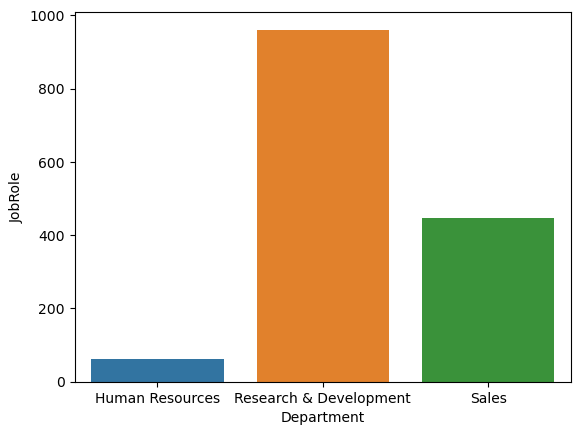

In [13]:
e=e.reset_index()
sb.barplot(data=e, x="Department", y="JobRole")
plt.show()


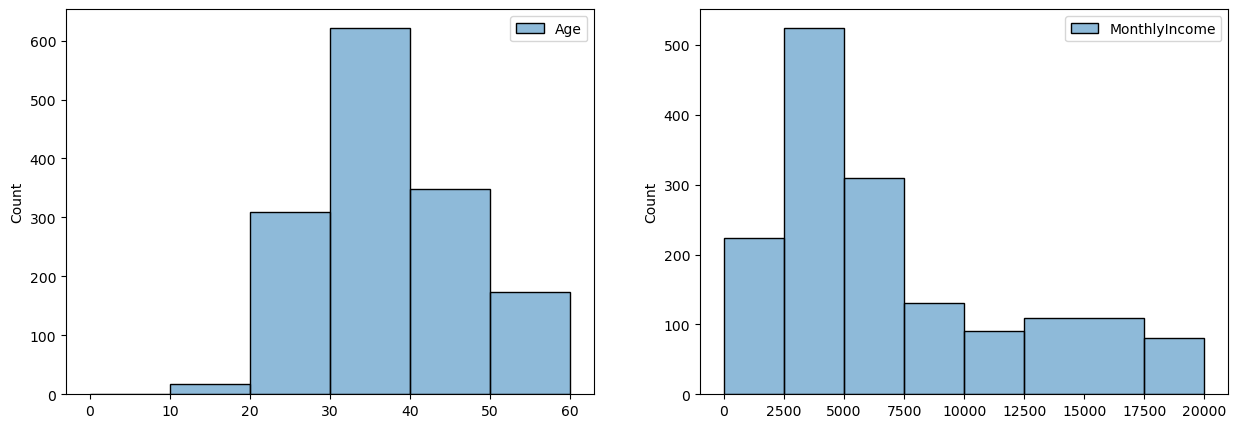

In [16]:
fig=plt.figure(figsize=(15,5))
x1=fig.add_subplot(1,2,1)
sb.histplot([df.Age],bins=[0,10,20,30,40,50,60])
x2=fig.add_subplot(1,2,2)
sb.histplot([df.MonthlyIncome],bins=[0,2500,5000,7500,10000,12500,17500,20000])
plt.show()

Correlation Analysis
--------------------

In [18]:
hm=df.corr(numeric_only=True)

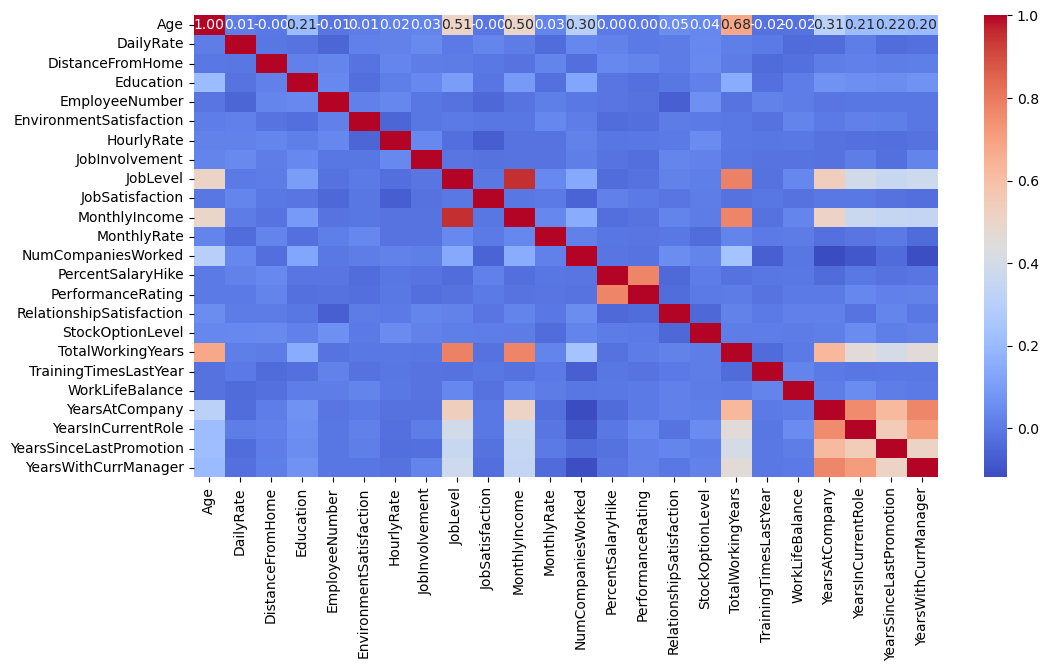

In [19]:
plt.figure(figsize=(12,6))

sb.heatmap(hm,annot=True,cmap="coolwarm",fmt='.2f',cbar=True)


plt.show()


Attirition Analysis
-------------------

In [ ]:
dy=df[df.Attrition=='Yes']

In [ ]:
dy

In [ ]:
dn=df[df.Attrition=='No']

In [ ]:
dn

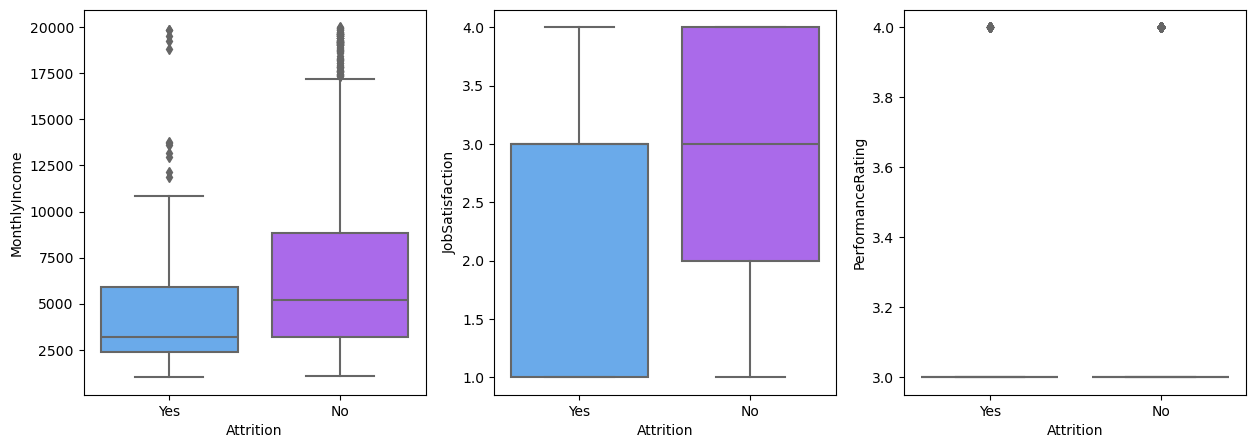

In [15]:
fig=plt.figure(figsize=(15,5))


x1=fig.add_subplot(1,3,1)

sb.boxplot(x='Attrition',y='MonthlyIncome',data=df, palette='cool')
x2=fig.add_subplot(1,3,2)

sb.boxplot(x='Attrition',y='JobSatisfaction',data=df, palette='cool')


x3=fig.add_subplot(1,3,3)
sb.boxplot(x='Attrition',y='PerformanceRating',data=df, palette='cool')

plt.show()

In [ ]:
df.PerformanceRating.unique()


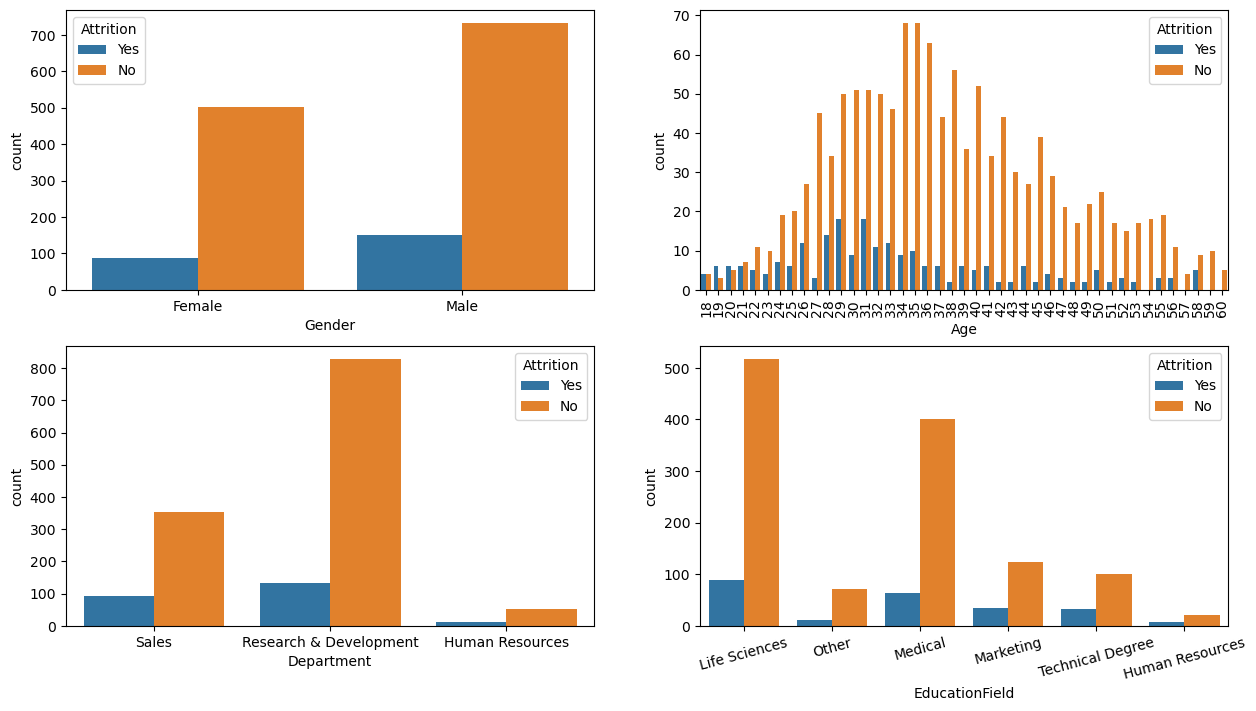

In [14]:
fig=plt.figure(figsize=(15,8))


x1=fig.add_subplot(2,2,1)

sb.countplot(data=df, x="Gender", hue="Attrition")
plt.xticks(rotation=0)

x1=fig.add_subplot(2,2,2)


sb.countplot(data=df, x="Age", hue="Attrition")
plt.xticks(rotation=90)
x1=fig.add_subplot(2,2,3)


sb.countplot(data=df, x="Department", hue="Attrition")
plt.xticks(rotation=0)
x1=fig.add_subplot(2,2,4)


sb.countplot(data=df, x="EducationField", hue="Attrition")
plt.xticks(rotation=15)
plt.show()